## Assignment 6: Embeddings

### net id: sa857

Due: Thursday, November 14, 2019

This assignment involves two problems related to word embeddings. The first problem explores word embeddings constructed on Wikipedia data. The second problem involves constructing embeddings of music artists from radio station song playlists.

Lots of guidance and code are given for solving the problems--the assignment shouldn’t take a long time to complete. The second problem should be straightfoward after you do the first problem. 



## Problem 1: Word embedding experiments (30 points)

In this problem you will run experiments on word embeddings using two different algorithms or configurations: word2vec embeddings trained on the "text8" Wikipedia corpus (2) GloVe embeddings pre-trained on a much larger corpus.

The text8 data are described here: http://mattmahoney.net/dc/textdata.html. You can download the data from http://mattmahoney.net/dc/text8.zip. Just unzip that file to obtain the text8 file, a 100MB excerpt of Wikipedia. This small dataset is sufficient for our exploratory purposes, but note that it is far too small for any real application.
In the next few parts of this problem, you will construct word embeddings from the Wikipedia data. 



`word2Vec` is a popular word embedding method. The following code will construct 100 dimensional embeddings on the text8 data.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import gensim
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
sentences = word2vec.Text8Corpus('/content/drive/My Drive/sds355-assn6-colab/text8')
model = word2vec.Word2Vec(sentences, size=100, window=10, min_count=10)

The dictionary `model.wv`, keyed by words (as strings), has values which are the word embeddings (as numpy arrays).

We will also work with pre-trained GloVe embeddings. These embeddings were trained on a large corpus containing 6 billion tokens. You can load these embedding vectors using this code:

In [5]:
import gensim.downloader as gdl
glove = gdl.load("glove-wiki-gigaword-100")

2019-11-09 01:01:46,918 : INFO : Creating /root/gensim-data


[==================================================] 100.0% 128.1/128.1MB downloaded


2019-11-09 01:02:07,154 : INFO : glove-wiki-gigaword-100 downloaded
2019-11-09 01:02:07,159 : INFO : loading projection weights from /root/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-11-09 01:03:10,647 : INFO : loaded (400000, 100) matrix from /root/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz


Here is a sample evaluation: puppy is to dog as what is to kitten?

In [6]:
glove.most_similar(positive = ['dog', 'kitten'], negative = ['puppy'])[0]

2019-11-09 01:03:44,809 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


('cat', 0.6935379505157471)

###  Experiments

Conduct the following experiments with both sets of embeddings: the local word2vec embeddings, and the pre-trained GloVe embeddings. Based on the available memory on your computer, you may need to perform the experiments for each set of embeddings in a fresh python session. Comment on the qualitative differences in the results for each of the embeddings.


### 1.1 Find closest words

For each of the following words, find the 5 closest words in the embedding space, and report your results:

          yale, physics, republican, einstein, algebra, fish
          
Here, "closest" means in terms of cosine similarity. See the gensim documentation; you might want to use the most similar function, or a related function. Choose five other query words yourself, and for each of them show the closest words in the embedding space. Comment on your findings.


In [61]:
# local embeddings
print(model.most_similar(positive = ['yale'], negative = [])[:5])
print(model.most_similar(positive = ['physics'], negative = [])[:5])
print(model.most_similar(positive = ['republican'], negative = [])[:5])
print(model.most_similar(positive = ['einstein'], negative = [])[:5])
print(model.most_similar(positive = ['algebra'], negative = [])[:5])
print(model.most_similar(positive = ['fish'], negative = [])[:5])

# print new line
print("")

# pre-trained glove embeddings
print(glove.most_similar(positive = ['yale'], negative = [])[:5])
print(glove.most_similar(positive = ['physics'], negative = [])[:5])
print(glove.most_similar(positive = ['republican'], negative = [])[:5])
print(glove.most_similar(positive = ['einstein'], negative = [])[:5])
print(glove.most_similar(positive = ['algebra'], negative = [])[:5])
print(glove.most_similar(positive = ['fish'], negative = [])[:5])

# print new line
print("")

# choose new queries with local embeddings
print(model.most_similar(positive = ['dog'], negative = [])[:5])
print(model.most_similar(positive = ['motor'], negative = [])[:5])
print(model.most_similar(positive = ['glasses'], negative = [])[:5])
print(model.most_similar(positive = ['headphones'], negative = [])[:5])
print(model.most_similar(positive = ['mouse'], negative = [])[:5])
print(model.most_similar(positive = ['apple'], negative = [])[:5])

# print new line
print("")

# choose new queries with glove embeddings
print(glove.most_similar(positive = ['dog'], negative = [])[:5])
print(glove.most_similar(positive = ['motor'], negative = [])[:5])
print(glove.most_similar(positive = ['glasses'], negative = [])[:5])
print(glove.most_similar(positive = ['headphones'], negative = [])[:5])
print(glove.most_similar(positive = ['mouse'], negative = [])[:5])
print(glove.most_similar(positive = ['apple'], negative = [])[:5])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/pyt

[('harvard', 0.86739581823349), ('rutgers', 0.7933057546615601), ('cornell', 0.7822531461715698), ('princeton', 0.7812350988388062), ('mcgill', 0.7332100868225098)]
[('mechanics', 0.8141873478889465), ('electromagnetism', 0.7639119625091553), ('electrodynamics', 0.7523519992828369), ('theoretical', 0.751075029373169), ('quantum', 0.7447795271873474)]
[('republicans', 0.8377021551132202), ('democrat', 0.8227306008338928), ('incumbent', 0.7834717631340027), ('democrats', 0.7801767587661743), ('presidential', 0.7523349523544312)]
[('bose', 0.7999887466430664), ('schr', 0.7938584089279175), ('fermi', 0.7896695137023926), ('planck', 0.7896208167076111), ('heisenberg', 0.7871779203414917)]
[('algebraic', 0.8691426515579224), ('banach', 0.8239494562149048), ('boolean', 0.8216785192489624), ('commutative', 0.8201351761817932), ('associative', 0.8176472187042236)]
[('cattle', 0.8216608166694641), ('fruit', 0.8177369832992554), ('shrimp', 0.8074572682380676), ('salmon', 0.8038936853408813), ('ve

### 1.2 Complete analogies

A surprising consequence of some word embedding methods is that they can be used to resolve analogies, like

                   france :  paris ::  england :  ?
                   
You can "solve" this analogy by computing the nearest embedding vector to $v$ where, $v = v_{paris} − v_{france} + v_{england}$.

Solve the following analogies with both sets of word embeddings and report your results:

                   france :  paris ::  england :  ?
                   france :  paris ::  germany :  ?
                     queen :  woman ::  king :  ?
                     
Choose five other analogies yourself, and report on the results.

In [47]:
# analogies with local embeddings
print(model.most_similar(positive = ['paris', 'england'], negative = ['france'])[0]) 
# expect "london", got "london"

print(model.most_similar(positive = ['paris', 'germany'], negative = ['france'])[0]) 
# expect "berlin", got "berlin"

print(model.most_similar(positive = ['woman', 'king'], negative = ['queen'])[0]) 
# expect "man", got "man"

# print new line
print("")

# analogies with glove embeddings
print(glove.most_similar(positive = ['paris', 'england'], negative = ['france'])[0]) 
# expect "london", got "london"

print(glove.most_similar(positive = ['paris', 'germany'], negative = ['france'])[0]) 
# expect "berlin", got "berlin"

print(glove.most_similar(positive = ['woman', 'king'], negative = ['queen'])[0]) 
# expect "man", got "man"

# print new line
print("")

# custom analogies with local embeddings
print(model.most_similar(positive = ['car', 'sea'], negative = ['road'])[0]) 
# expect "boat", got "mosquito"

print(model.most_similar(positive = ['moon', 'day'], negative = ['night'])[0]) 
# expect "sun", got "planet"

print(model.most_similar(positive = ['bow', 'ball'], negative = ['arrow'])[0]) 
# expect "bat", got "kick"

print(model.most_similar(positive = ['march', 'winter'], negative = ['spring'])[0]) 
# expect "november" or similar, got "november"

print(model.most_similar(positive = ['cheetah', 'slow'], negative = ['fast'])[0])
 # expect "turtle" or similar, got "woolly"

# print new line
print("")

# custom analogies with glove embeddings
print(glove.most_similar(positive = ['car', 'sea'], negative = ['road'])[0]) 
# expect "boat", got "tanker"

print(glove.most_similar(positive = ['moon', 'day'], negative = ['night'])[0])
# expect "sun", got "lunar"

print(glove.most_similar(positive = ['bow', 'ball'], negative = ['arrow'])[0]) 
# expect "bat", got "balls"

print(glove.most_similar(positive = ['march', 'winter'], negative = ['spring'])[0]) 
# expect "november" or similar, got "august"

print(glove.most_similar(positive = ['cheetah', 'slow'], negative = ['fast'])[0]) 
# expect "turtle" or similar, got "leopard"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/pyt

('london', 0.7007442712783813)
('berlin', 0.8477134704589844)
('man', 0.6812946796417236)

('london', 0.8123227953910828)
('berlin', 0.8846380710601807)
('man', 0.7907768487930298)

('mosquito', 0.5606973171234131)
('planet', 0.531290590763092)
('kick', 0.716469407081604)
('november', 0.7909088730812073)
('woolly', 0.7092350721359253)

('tanker', 0.6246403455734253)
('lunar', 0.6943570375442505)
('balls', 0.6385370492935181)
('august', 0.824055552482605)
('leopard', 0.5398885011672974)


### 1.3 Visualize embeddings

Use the t-SNE dimensionality reduction technique to visualize only the pre-trained GloVe embeddings in two dimensions. The code in `tsne_viz.ipynb` will perform the t-SNE method on a subset of the vocabulary. You can start with this code and modify it as you choose to construct visualizations of the embeddings. Or start with your own version of t-SNE.
The code provided shows the relative positions of the words conservative, liberal, elephant, and donkey. Find at least three more examples that produce expected results and three examples that produce surprising results. Include the plots in your write-up. Give reasons why you might see surprising behavior here.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [0]:
# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_neighborhood(model, input_word, nsample=1000, size1=2, size2=10, offset=5):
    
    arr = np.empty((0,100), dtype='f')
    word_label = input_word

    # add the vector for each of the closest words to the array
    for w in range(len(input_word)):
        arr = np.append(arr, np.array([model[input_word[w]]]), axis=0)

    voc = [w for w in model.vocab]
    wrds = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in wrds:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(input_word)], y_coord[0:len(input_word)],s=size2)
    
    # label the input words
    for w in range(len(input_word)):
        plt.annotate(input_word[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()
    


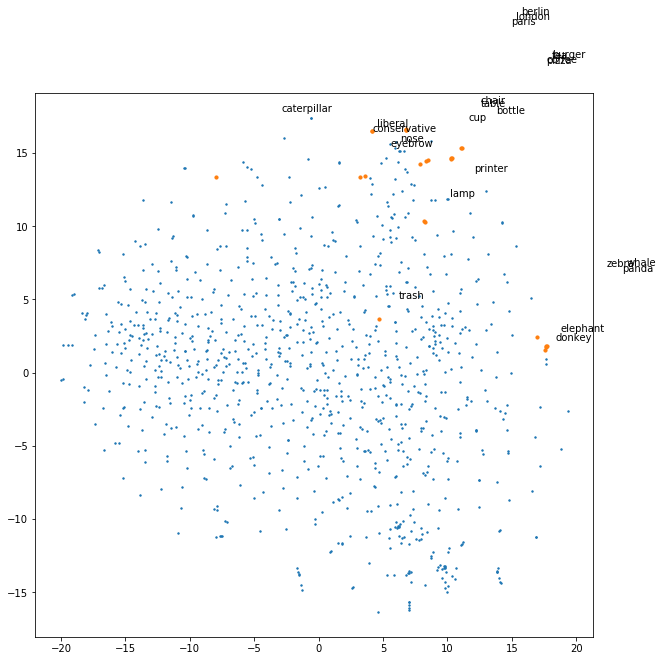

In [65]:
plt.figure(figsize=(10,10))
words = ['conservative', 'liberal', 'donkey', 'elephant', 'trash', 'lamp', 
         'eyebrow', 'nose', 'cup', 'bottle', 'printer', 'table', 'chair', 
         'caterpillar', 'zebra', 'panda', 'whale', 'pizza', 'burger', 
         'coffee', 'tea', 'paris', 'london', 'berlin']
display_tsne_neighborhood(glove, input_word=words)

- An unexpected result was the closeness of facial features (e.g. eyebrow, nose) to personality traits (e.g. liberal, conservative). 
- An unexpected result was the large separation between caterpillar and other animals.
- An expected result was the closeness of foods (e.g. burger, pizza).
- An expected result was the large separation between animals (e.g. elephant, donkey, whale, panda etc.) and things/places (e.g. city capitals, printer, lamp etc.) was expected.

## Problem 2: Experiments with Musician Embeddings (15 points)


In this problem, we will use a collection of playlists obtained from [last.fm](http://last.fm). We treat each playlist as a document, and each artist in the playlist as a word. By feeding this dataset to word2vec, we will be able to learn artist embeddings.

### Artist Embeddings

The following experiments will be done with the playlist data file `playlists.txt`. Each line in this file is a playlist. The integers on each line are unique artist identifiers, indicating which artists were in each playlist. The artists are in `artists.txt`.

### 2.1 Construct embeddings

The code in `embed_artists.ipynb` constructs artist embeddings with word2vec. The artist names are mapped to id numbers in the playlists; the code maps them back to display the names. Copy that code here and run it.


In [0]:
playlists = word2vec.LineSentence('/content/drive/My Drive/sds355-assn6-colab/playlists.txt')
music_model = word2vec.Word2Vec(playlists, size=64, window=100, min_count=10)

In [72]:
music_model.wv['299']

array([ 0.14180742, -0.43887007,  0.01810103,  0.19324115, -0.812279  ,
       -0.61055195,  0.83062327, -0.5549312 , -0.8520633 , -0.09950253,
       -0.22619867, -0.00461907,  0.4389969 ,  0.1132246 , -0.5273641 ,
        0.69033134, -0.8875024 , -0.00473082, -0.7955066 , -0.72449195,
        0.4493457 ,  0.05596791, -0.92746097, -0.72172767, -0.4935069 ,
       -0.5314222 , -0.36990032,  1.0847927 , -0.154237  ,  0.23520544,
       -0.8865764 , -0.29370266,  0.5083768 ,  0.92101675,  0.20377551,
       -1.066043  , -0.2658348 , -0.40660694, -0.8065734 ,  0.5564383 ,
       -0.36462072,  0.21297763, -0.7739998 , -0.5253346 ,  0.25879303,
        1.0277314 , -0.23105654,  0.13377713, -0.06958584, -0.04572755,
        0.43567657, -0.02929765,  1.0704108 , -0.00052168, -0.3008884 ,
        0.30658165, -0.02943784,  0.1493669 ,  1.2334499 ,  0.7044247 ,
        0.62439966, -0.17544167,  0.5607763 ,  0.77575356], dtype=float32)

In [73]:
artist = [art.strip() for art in open('/content/drive/My Drive/sds355-assn6-colab/artists.txt', 'r')]
artist[0:10]

['Everette Harp',
 'Bishop Paul S. Morton & Aretha Franklin',
 'Frankie Ballard',
 'Herb Alpert',
 'Rod Stewart & Chaka Khan',
 'Scars On 45',
 'New Radicals',
 'Crosby, Stills & Nash',
 'Ledisi',
 'La Quinta Estacion']

In [74]:
id2name = {}
name2id = {}
for w in range(len(artist)):
    id2name["%s" % w] = artist[w]
    name2id[artist[w]] = "%s" % w

id2name[name2id['Elton John']]

'Elton John'

In [77]:
def similar_artists(model, artist, n=5):
    id = name2id[artist]
    out = model.wv.most_similar(id, topn=n)

    print("artists similar to '%s'\n" % artist)
    for i in range(n) :
        name = id2name[out[i][0]]
        print("\t%s" % name)
        
similar_artists(music_model, 'Aerosmith')

2019-11-09 03:00:37,743 : INFO : precomputing L2-norms of word weight vectors


artists similar to 'Aerosmith'

	Billy Idol
	The Jimi Hendrix Experience
	The Black Crowes
	Def Leppard
	Led Zeppelin


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_artists(model, artists, nsample=1000, size1=2, size2=10, offset=5):
    
    arr = np.empty((0,64), dtype='f')

    # add the vector for each of the closest words to the array
    for a in range(len(artists)):
        id = name2id[artists[a]]
        arr = np.append(arr, np.array([model[id]]), axis=0)

    voc = [w for w in model.wv.vocab]
    ids = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in ids:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(artists)], y_coord[0:len(artists)],s=size2)
    
    # label the input words
    for w in range(len(artists)):
        plt.annotate(artists[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()

### 2.2 Similar artists

Find the 5 closest artist embedding vectors to the artists "The Beatles", "Lady Gaga", and "Nirvana". Comment on the results.

In [91]:
print(similar_artists(music_model, 'The Beatles'))
print(similar_artists(music_model, 'Lady Gaga'))
print(similar_artists(music_model, 'Nirvana'))

artists similar to 'The Beatles'

	Steppenwolf
	Grand Funk Railroad
	Creedence Clearwater Revival
	The Electric Light Orchestra
	Stephen Stills
None
artists similar to 'Lady Gaga'

	Bruno Mars
	Black Eyed Peas
	Katy Perry
	Ke$ha
	Erasure
None
artists similar to 'Nirvana'

	Bush
	Stone Temple Pilots
	The Red Hot Chili Peppers
	Days Of The New
	Pearl Jam
None


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


- The results are expected and quite good. I'm not very familiar with the artists shown for The Beatles, however, I know that Steppenwolf and Creedence Clearwater Revival are roughly from a similar period and are part of the rock genre.
- The Lady Gaga suggestions are quite good and display other pop artists. However, I think that the dataset must be from the early 2000s because it may not reflect recent artist focus e.g. Bruno Mars' R&B focus. 
- Again, I'm not familiar with the Nirvana suggestions but the artists seem quite close e.g. the Red Hot Chili Peppers


### 2.3 Visualize embeddings

As for the word embeddings question, use the t-SNE dimensionality reduction technique to visualize the artist embeddings. After running t-SNE on the artist embeddings, try visualizing  "The Temptations" and "The Supremes" together. Find a few more examples that you think are interesting and include the plots in your write-up. Comment on your findings.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


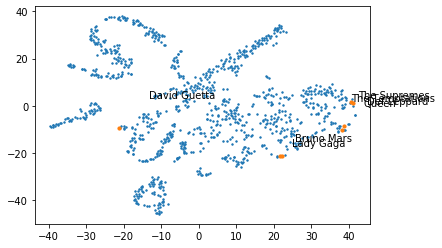

In [96]:
artists = ['The Temptations', 'The Supremes', 'Lady Gaga', 'Bruno Mars', 'Queen', 'Def Leppard', 'David Guetta']
display_tsne_artists(music_model, artists)

- The overall point cloud looks interesting, instead of being homogenously separated, it has got multiple clusters, which are ostensibly different music genres.
- The vocal groups (Temptations and Supremes) are quite close together, as expected.
- The rock bands Queen and Def Leppard are also close together. It's interesting that they are also close to the vocal groups. This might be because of similar time frame. 
- The pop artists Lady Gaga and Bruno Mars are quite close, as expected. 
- Interestingly, the DJ and electronic producer David Guetta is quite far from the other artists categories. This is consistent with the differences in music style.